__Ejercicio 1__. Escribe una función `derivadaNumerica` que
reciba: una función $f\colon \mathbb{R}\mapsto\mathbb{R}$,
un punto $x_0\in\mathbb{R}$ y un número $h\in\mathbb{R}$. Esta función deberá calcular una aproximación a la
derivada utilizando la definición indicada arriba ignorando
la parte del límite. Es decir, algo como: `derivada_numerica(f,x,h)`.

In [1]:
Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
using SymPy
using PyPlot

In [3]:
x=symbols("x")

x

In [4]:
df=0.0;
function derivadaNumerica(f,x,h)
    df=(f(x+h)-f(x))/h;
end

derivadaNumerica (generic function with 1 method)

In [5]:
derivadaNumerica(x^2,1,0.0001)

2.00009999999917

__Ejercicio 2__. Utiliza tu función `derivadaNumerica` para
calcular la derivada de la función $\cos$ en un punto
$x_0\in[0,1)$. Compara tu resultado con el que indica el
cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$.
Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$:
$$\epsilon=\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)},$$
respecto a $h$.

In [6]:
f(x)=cos(x)
x0=0.5
list1=zeros(15,2)
for i in 1:15
    list1[i,1]=(1.5^i)
    list1[i,2]=derivadaNumerica(f(x),x0,1/(1.5^i))
end

In [7]:
list2=zeros(15)
for i in 1:15
    list2[i]=-sin(x0);
end

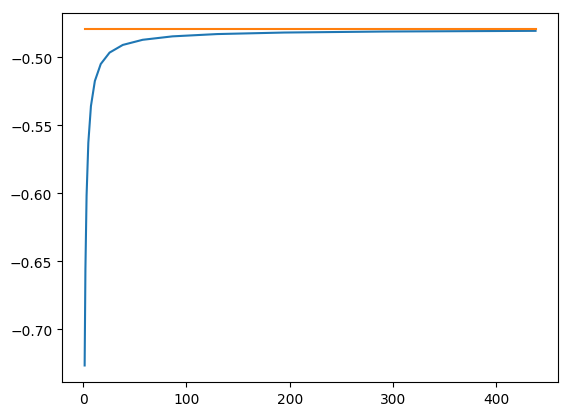

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f86c4a6ee90>

In [8]:
plot(list1[1:15,1],list1[1:15,2])
plot(list1[1:15,1],list2)

__Ejercicio 3__. Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe
alguna forma de mejorar el cálculo de la derivada numérica? Comenta.

__Tip:__ ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series? 

__Nota:__ Entregar en $\LaTeX$ en el notebook de la tarea.

La serie de Taylor para $f(x+h)$ es:

$f(x+h)= f(x)+f'(x)\frac{h}{1!}+f''(x)\frac{h^2}{2!}+f^{(3)}(x)\frac{h^3}{3!}+...$

Mientras que la serie de Taylor para $f(x-h)$ es:

$f(x+h)= f(x)+f'(x)\frac{(-h)}{1!}+f''(x)\frac{(-h)^2}{2!}+f^{(3)}(x)\frac{(-h)^3}{3!}+...$

o equivalentemente

$f(x-h)= f(x)-f'(x)\frac{h}{1!}+f''(x)\frac{h^2}{2!}-f^{(3)}(x)\frac{h^3}{3!}+...$

si restamos ambas 

$f(x+h)-f(x-h)= 2hf'(x)+f^{(3)}\frac{2h^3}{3!}+f^{(5)}\frac{2h^5}{5!}+...$

Así,como los términos restantes son ordenes grandes $(3,5,7...)$ de $h$ pequeña

$\dfrac{f(x+h)-f(x-h)}{2h}\approx f'(x)$

__Pregunta:__ ¿Hay una forma de construir una derivada numérica aún mas exacta sin tener que hacer $h$ arbitrariamente pequeño?, ¿que opinas?

__Ejercicio 4__. Implementa la _derivada
simétrica_ en `Julia` como `derivada_Simetrica` y repite la
comparativa que realizaste en el __ejercicio 2__.


In [9]:
function derivada_Simetrica(f,x,h)
    df=0.0;
    df=(f(x+h)-f(x-h))/(2*h);
end

derivada_Simetrica (generic function with 1 method)

In [10]:
derivada_Simetrica(x^2,1,0.0001)

1.99999999999922

Analizando la serie de la diferencia finita hacia adelante podemos factorizar la función útilizando la propiedad de linealidad del operador derivada, antes pasando del lado izquierdo de la serie a $f(x)$:

\begin{eqnarray}
f(x+h)-f(x)&=& \left[h \left. \frac{d}{d \xi}  \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}   \right|_{\substack{ \xi_{1}=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}   \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)\right]f{\left (x \right )}\\
&=&\left[ \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right]f(x)
\end{eqnarray}
Luego podemos definir el operador $\Delta_h$, el cual se define como:
$$\Delta_h:f \mapsto f(x+h)-f(x)=\Delta f(x,h).$$
__Ejercicio 5:__ Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

__Ejercicio 6:__ Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.
    
* __Nota:__ En la clase se demostró que $\phi(x)=e^x-1$, escriba el razonamiento en $\LaTeX$ de como se llegó a esto.

__Ejercicio 7:__ Explotar la relación $\delta_h=\Delta_h-\Delta_{-h}$, donde $\delta_h:f(x)\mapsto f(x+h)-f(x-h)$, para encontrar cual es la función $\theta$ que relaciona a $\delta_h$ con el operador derivada exacta, es decir:
$$\delta_h=\theta\left(h\left. \frac{d}{d\xi}\right|_{\xi=x}\right).$$

Una vez que la encuentren, despejen $\left. \frac{d}{d\xi}\right|_{\xi=x}$ y calculen la serie de Taylor de mánera similar a lo mostrado en las ecuaciones 3 y 4.